In [21]:
import pickle as pkl
import json
import os
import os.path as osp
import sys
import pandas as pd

In [61]:
godModelPath = '/media/data/chnxi/GOD/Models/'
modelName = 'Open800k/frcnn_8gpuxbs2-iter_1600000-lr_0.02/' #'Open800k/retr50_bs_4-iter_450000-lr_0.01'
test_scale = 400
softNMS = False
valSetList = ['GOD_OpenImage_val', 'GOD_FashionV2_val','GOD_furniture_val','GOD_coco_2014_minival']
evalFolder = 'Test_{}-SoftNMS-{}'.format(test_scale, softNMS)
modelType = 'retinanet' if 'ret' in modelName else 'generalized_rcnn'

/media/data/chnxi/GOD/Models/Open800k/frcnn_8gpuxbs2-iter_1600000-lr_0.02/Test_400-SoftNMS-False/GOD_OpenImage_val/generalized_rcnn
dict_keys(['recallThrs', 'locPrecisions', 'locAPs', 'locAP50', 'locAPDict', 'locAP50Dict', 'loc_thrsh_at_prec', 'loc_thrsh_at_rec', 'classes'])
{0.9: {0: {'score': 0.999639630317688, 'recall': 0.0}}, 0.85: {0: {'score': 0.999639630317688, 'recall': 0.0}}, 0.8: {0: {'score': 0.999639630317688, 'recall': 0.0}}, 0.75: {0: {'score': 0.999639630317688, 'recall': 0.0}}}
{0.4: {0: {'score': 0.6310730576515198, 'precision': 0.32719551231261684}}}
{0.9: {'score': 0.999639630317688, 'recall': 0.0}, 0.85: {'score': 0.999639630317688, 'recall': 0.0}, 0.8: {'score': 0.999639630317688, 'recall': 0.0}, 0.75: {'score': 0.999639630317688, 'recall': 0.0}}
/media/data/chnxi/GOD/Models/Open800k/frcnn_8gpuxbs2-iter_1600000-lr_0.02/Test_400-SoftNMS-False/GOD_FashionV2_val/generalized_rcnn
dict_keys(['recallThrs', 'locPrecisions', 'locAPs', 'locAP50', 'locAPDict', 'locAP50Dict',

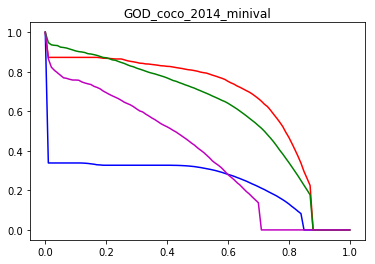

In [63]:
import matplotlib.pyplot as plt
colors = ['b','r','g','m']
for ix, valset in enumerate(valSetList):
    valFolder = osp.join(godModelPath, modelName, evalFolder, valset, modelType)
    print (valFolder)
    locPkl = osp.join(valFolder, 'localization_pr_curves.pkl')
    d = pkl.load(open(locPkl,'rb'))
    print (d.keys())
    print (d['loc_thrsh_at_prec'])
    print (d['loc_thrsh_at_rec'])
    dd = {key:d['loc_thrsh_at_prec'][key][0] for key in d['loc_thrsh_at_prec']}
    print (dd)
    df  = pd.DataFrame.from_dict(dd, orient='index')
    plt.title(valset)
    col = colors[ix]
    plt.plot(d['recallThrs'], d['locPrecisions'][0,:], col+'-')

In [64]:
df

,score,recall
0.75,0.962295,0.11
0.80,0.991967,0.03
0.85,0.996904,0.01
0.90,0.999732,0.00
